<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../')) 



In [2]:
from super_simulation.super_simulation_factory import (
    SuperSimulationFactory,
)
from transition_table import (
    TransitionTable,
)
from spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml

%config Completer.use_jedi = False

In [4]:
path_from_state_folder = "FED/federal_prison_model_inputs.yaml"
display_compartments = ["prison"]
test_sim = SuperSimulationFactory.build_super_simulation(
    "state/" + path_from_state_folder
)
test_sim.simulate_baseline(display_compartments)

FileNotFoundError: [Errno 2] No such file or directory: 'state/FED/federal_prison_model_inputs.yaml'

initialization time:  6.833798885345459
initialization time:  6.183797121047974
simulation_time:  7.8541083335876465
simulation_time:  8.391791820526123


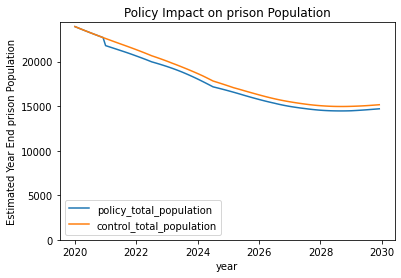

In [13]:
# test_sim = SuperSimulationFactory.build_super_simulation('../state/WI/WI_prison_model_inputs.yaml')

# Policy Option Methods
powder_transitions = test_sim.initializer.data_dict["transitions_data"]
powder_transitions = powder_transitions[
    (powder_transitions.compartment == "prison")
    & (powder_transitions.crime_type == "powder")
]


def remove_sentencing_disparities(retroactive=False):
    return partial(
        TransitionTable.use_alternate_transitions_data,
        alternate_historical_transitions=powder_transitions,
        retroactive=retroactive,
    )


policy_list_non_retroactive = [
    SparkPolicy(
        policy_fn=remove_sentencing_disparities(True),
        spark_compartment="prison",
        sub_population={"crime_type": "crack"},
        policy_ts=48,
        apply_retroactive=True,
    )
]

test_results = test_sim.simulate_policy(policy_list_non_retroactive, "prison")

In [14]:
test_sim.upload_policy_simulation_results_to_bq("federal_prison_retro")

{'spending_diff':                        prison release release_full
 year                                              
 2020.000000               0.0     0.0          0.0
 2020.083333               0.0     0.0          0.0
 2020.166667               0.0     0.0          0.0
 2020.250000               0.0     0.0          0.0
 2020.333333               0.0     0.0          0.0
 ...                       ...     ...          ...
 2029.583333  179026436.139282     0.0          0.0
 2029.666667  180406321.393974     0.0          0.0
 2029.750000  181781655.167447     0.0          0.0
 2029.833333  183154541.909399     0.0          0.0
 2029.916667  184526893.840617     0.0          0.0
 
 [120 rows x 3 columns],
 'compartment_life_years_diff':                   prison      release release_full
 year                                              
 2020.000000          0.0          0.0          0.0
 2020.083333          0.0          0.0          0.0
 2020.166667          0.0          0.0   